In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
df=pd.read_csv(r"C:\Users\Hamed\PycharmProjects\Hamed\DS\Hotel\AB_NYC_2019.csv")

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### As you can see, null cells of name and host_name columns are not clear in the following image because of the large number of data

Text(0.5, 1, 'Heatmap of null cells')

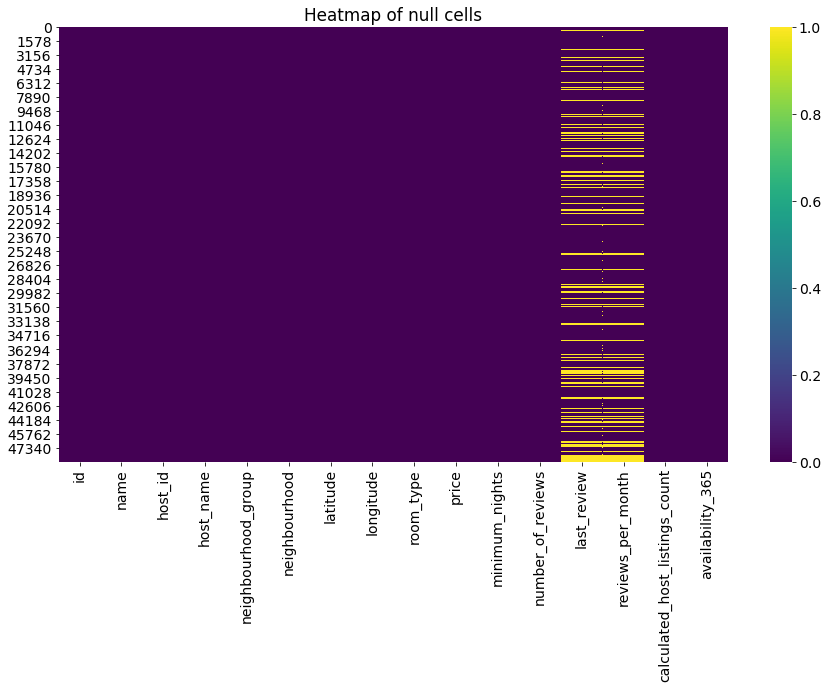

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cbar=True,cmap='viridis')
plt.title('Heatmap of null cells')

In [5]:
print(len(df['neighbourhood_group'].unique()),len(df['room_type'].unique()), len(df['neighbourhood'].unique()), len(df['name'].unique()))
print('Neighbourhood Groups:',df['neighbourhood_group'].unique())
print('Room Types:',df['room_type'].unique())

5 3 221 47906
Neighbourhood Groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Room Types: ['Private room' 'Entire home/apt' 'Shared room']


Text(0.5, 0, 'Neighbourhood Groups')

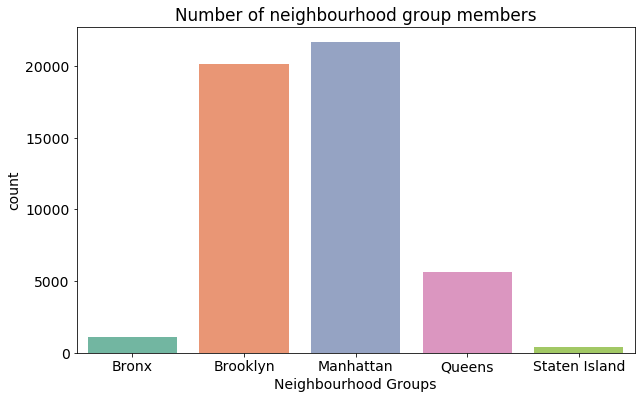

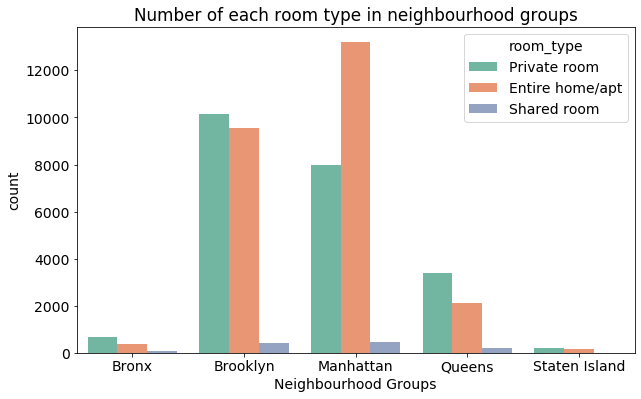

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['neighbourhood_group'].sort_values(ascending=True),palette='Set2')
plt.title('Number of neighbourhood group members')
plt.xlabel('Neighbourhood Groups')

plt.figure(figsize=(10,6))
plt.title('Number of each room type in neighbourhood groups')
sns.countplot(x=df['neighbourhood_group'].sort_values(ascending=True),hue=df['room_type'],palette='Set2')
plt.xlabel('Neighbourhood Groups')


Text(0, 0.5, 'Price($)')

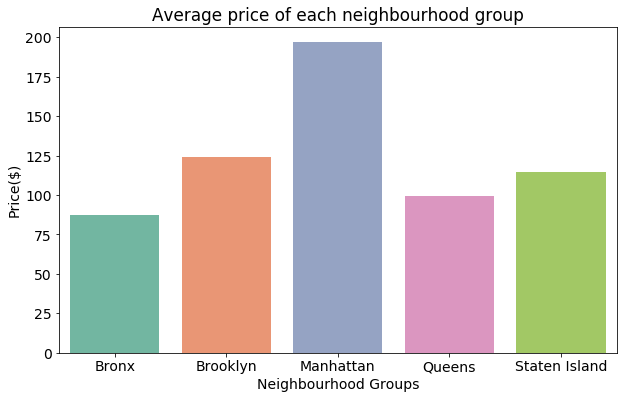

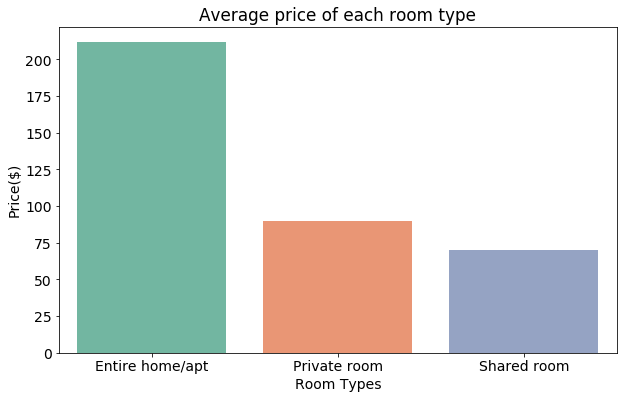

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(df.groupby(['neighbourhood_group']).mean().index.sort_values(ascending=True), df.groupby(['neighbourhood_group']).mean()['price'],palette='Set2')
plt.title('Average price of each neighbourhood group')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Price($)')

fig=plt.figure(figsize=(10,6))
sns.barplot(df.groupby(['room_type']).mean().index.sort_values(ascending=True), df.groupby(['room_type']).mean()['price'],palette='Set2')
plt.title('Average price of each room type')
plt.xlabel('Room Types')
plt.ylabel('Price($)')


Text(0, 0.5, 'Price($)')

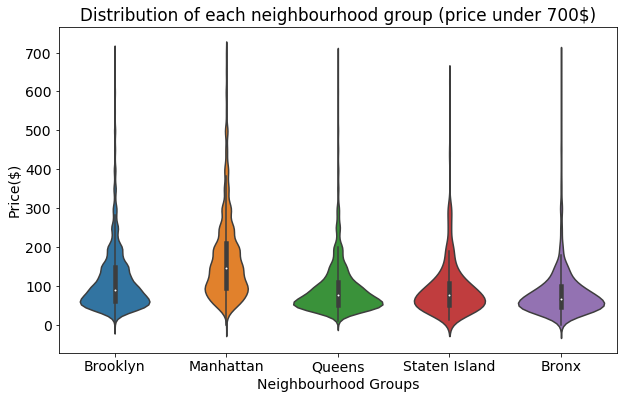

In [8]:
fig=plt.figure(figsize=(10,6))
sns.violinplot(data=df[df['price']<700], x='neighbourhood_group', y='price')
plt.title('Distribution of each neighbourhood group (price under 700$)')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Price($)')


Text(0, 0.5, 'Price($)')

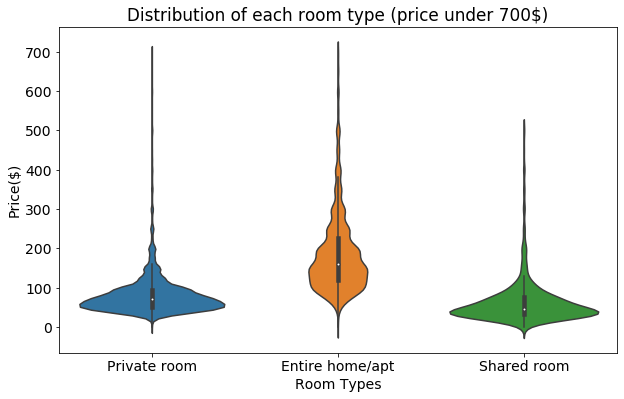

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df[df['price']<700], x='room_type', y='price')
plt.title('Distribution of each room type (price under 700$)')
plt.xlabel('Room Types')
plt.ylabel('Price($)')


Text(92.875, 0.5, 'Latitude')

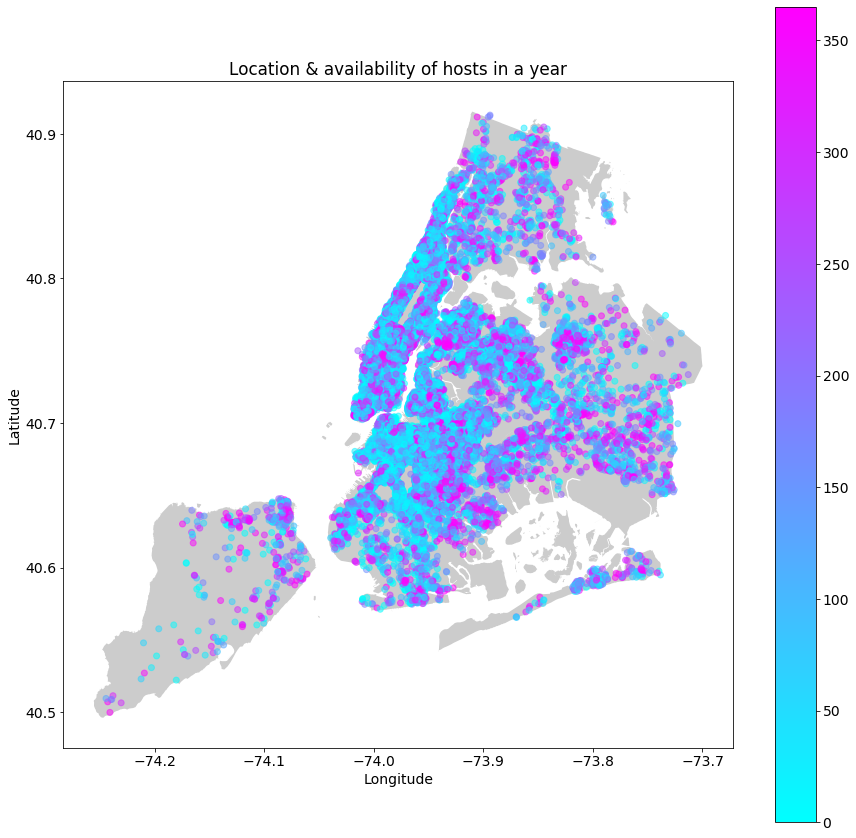

In [10]:
area = gpd.read_file(r"C:\Users\Hamed\PycharmProjects\Hamed\DS\Hotel\geo_export_eae6d77e-f47a-4c54-9533-ee7d42c0f271.shp")
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
df_geo = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, alpha=0.4,color='grey')
df_geo.plot(column='availability_365',ax=ax, cmap="cool", legend=True, alpha=0.5)
plt.title("Location & availability of hosts in a year")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(92.875, 0.5, 'Latitude')

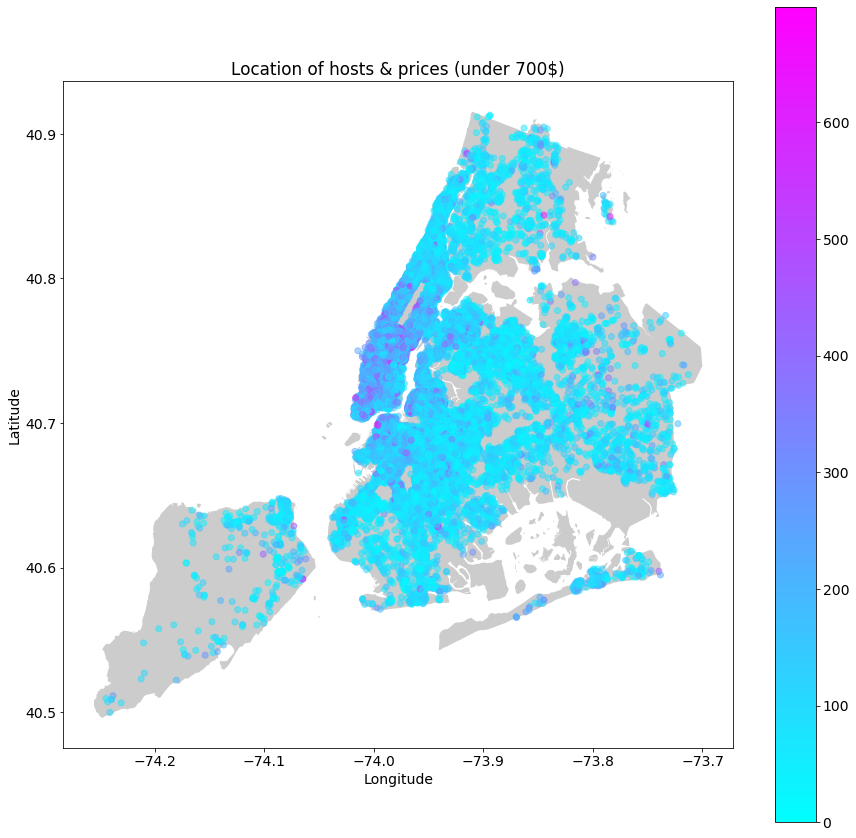

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, alpha=0.4,color='grey')
df_geo[df_geo['price']<700].plot(column='price',ax=ax, cmap="cool", legend=True, alpha=0.5, k=4)
plt.title("Location of hosts & prices (under 700$)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(101.97582711208878, 0.5, 'Latitude')

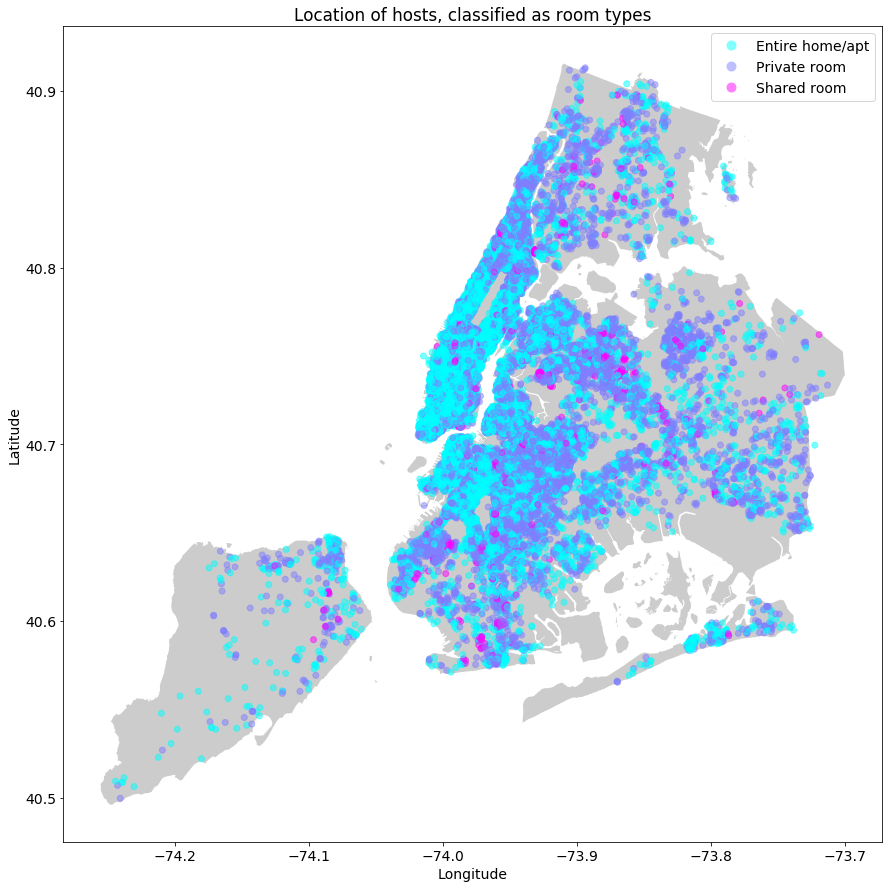

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, alpha=0.4,color='grey')
df_geo.plot(column='room_type',ax=ax, cmap="cool", legend=True, alpha=0.5, categorical=True)
plt.title("Location of hosts, classified as room types")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(102.16768594561836, 0.5, 'Latitude')

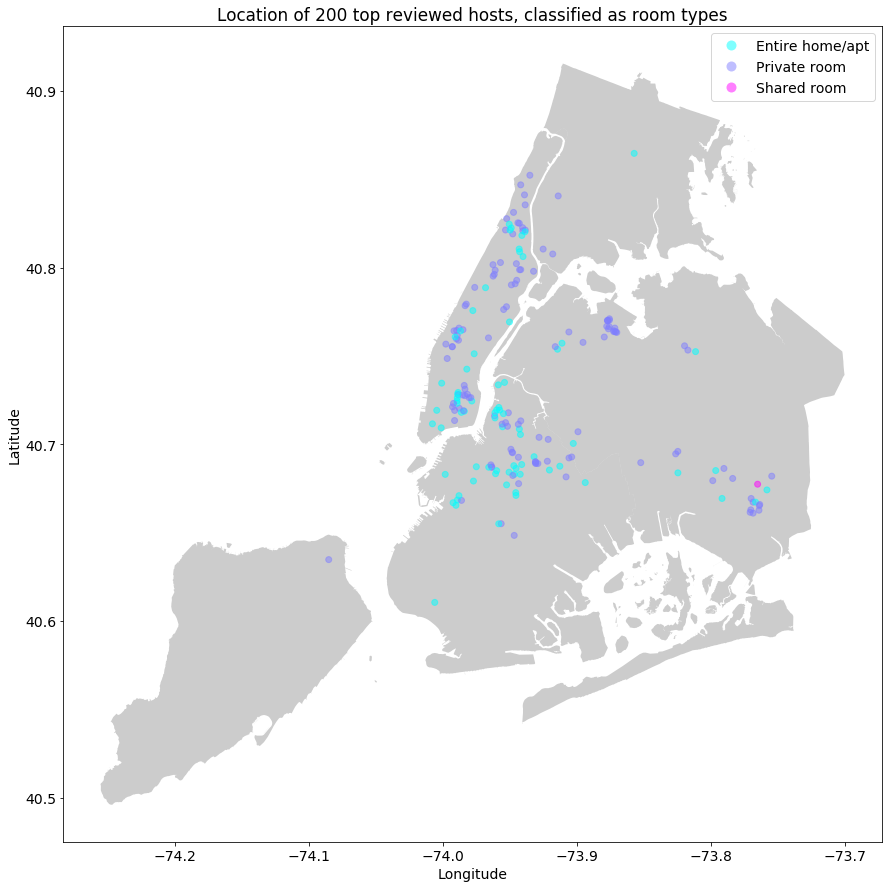

In [13]:
df2=df_geo.sort_values(['number_of_reviews'], ascending=False)
df2.reset_index(inplace=True)
df2=df2[:200]
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, alpha=0.4,color='grey')
df2.plot(column='room_type',ax=ax, cmap="cool", legend=True, alpha=0.5, categorical=True)
plt.title("Location of 200 top reviewed hosts, classified as room types")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(92.875, 0.5, 'Latitude')

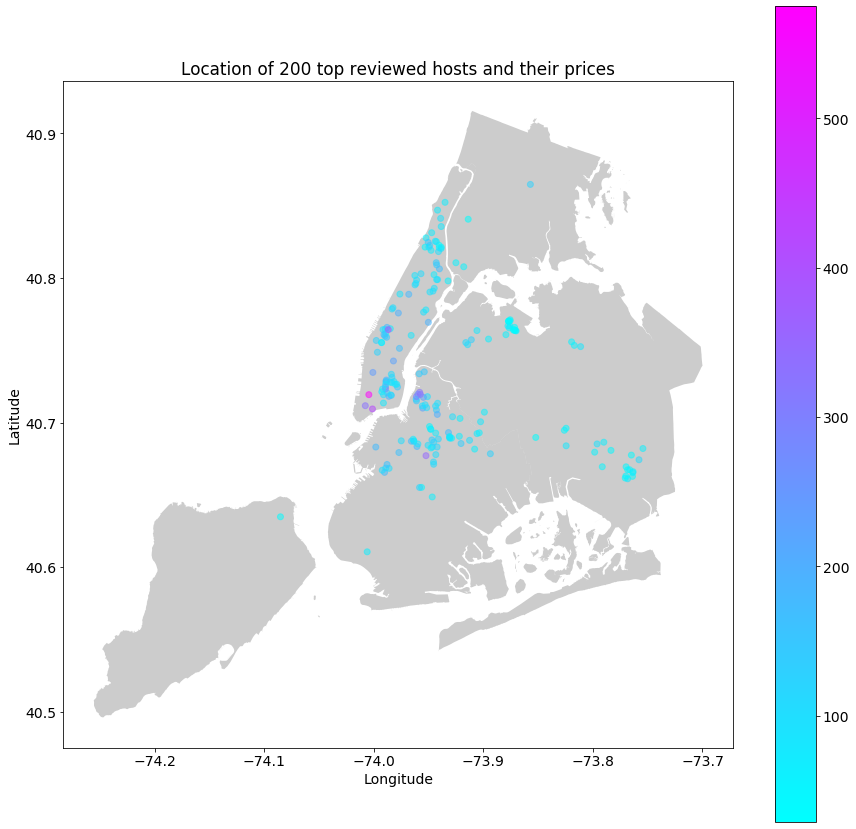

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, alpha=0.4,color='grey')
df2.plot(column='price',ax=ax, cmap="cool", legend=True, alpha=0.5, k=4)
plt.title("Location of 200 top reviewed hosts and their prices")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
